In [299]:
import pandas as pd

In [300]:
data = pd.read_csv("medical-charges.csv")
data.shape

(1338, 7)

In [301]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [302]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [303]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Exploratory Analysis and Visualization

In [304]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Age

In [305]:
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [306]:
fig = px.histogram(data, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()
#The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. 

Body Mass Index

In [307]:
data.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [308]:
fig = px.histogram(data, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()
#The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right

Charges

In [309]:
x = data.charges[data.smoker=='yes']
x.describe()

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

In [310]:
y = data.charges[data.smoker=='no']
y.describe()

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

In [311]:
fig = px.histogram(data, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()
#For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses.
# There is a significant difference in medical expenses between smokers and non-smokers.

In [312]:
fig = px.histogram(data, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Smoker

In [313]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [314]:
px.histogram(data, x='smoker', color='sex', title='Smoker')
#It appears that male smoke more than female

Age and Charges

In [315]:
fig = px.scatter(data, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()
# The general trend seems to be that medical charges increase with age
# The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

# The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

# The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

BMI and Charges

In [316]:
fig = px.scatter(data, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()
#smoke and bmi hight ==> high charges

Children vs Charges

In [317]:
px.violin(data,x='children',y='charges')

Correlation

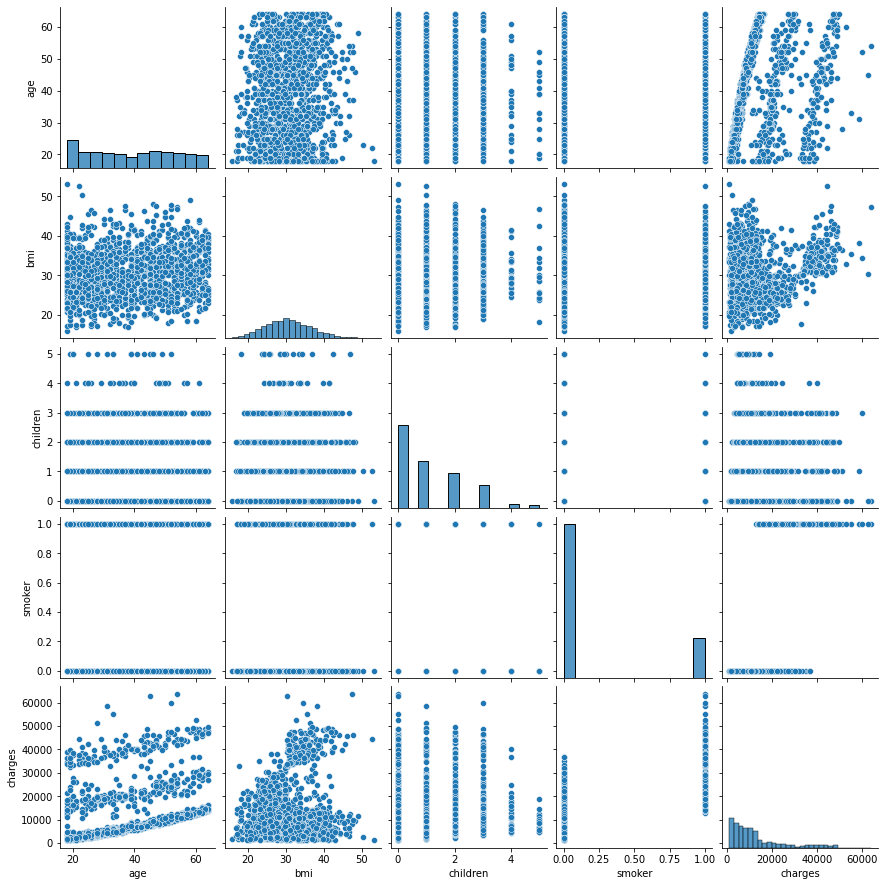

In [318]:
data2 = data.replace({'no': 0, 'yes': 1})
sns.pairplot(data2)


In [319]:
data2.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


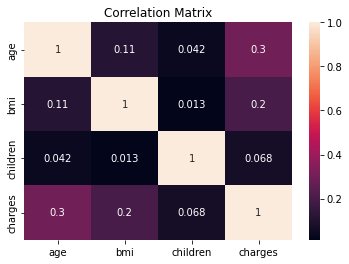

In [320]:
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix');

Linear Regression using a Single Feature

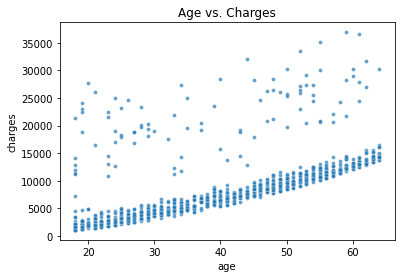

In [321]:
non_smoker_df = data[data.smoker == 'no']
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [322]:
def estimate_charges(age, w, b):
    return w * age + b

In [323]:
w = 50
b = 100

In [324]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

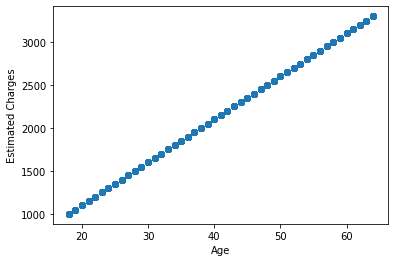

In [325]:
plt.scatter(ages, estimated_charges);
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

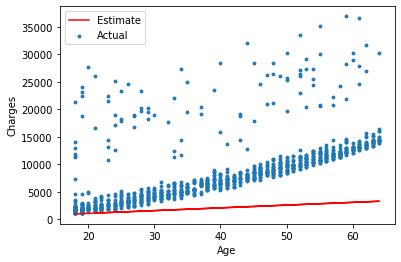

In [326]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r');
plt.scatter(ages, target, s=8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [327]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [328]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)
rmse(targets, predicted)

8461.949562575493

In [329]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


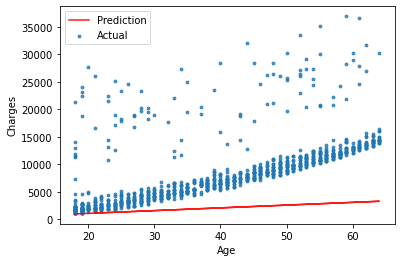

In [330]:
try_parameters(w,b)

Linear Regression using Scikit-learn

In [331]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
model.fit(inputs, targets)


LinearRegression()

In [332]:
predictions = model.predict(inputs)
rmse(targets, predictions)

4662.505766636395

In [333]:
w=model.coef_
b=model.intercept_

RMSE Loss:  4662.505766636395


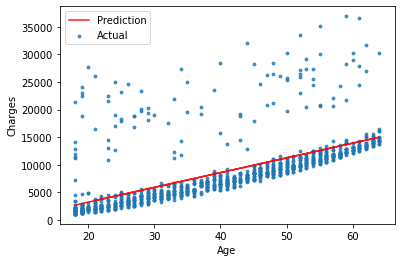

In [334]:
try_parameters(model.coef_, model.intercept_)

In [335]:
# def try_parameters2(w, b):
#     ages = smoker_df.age
#     target = smoker_df.charges
#     predictions = estimate_charges(ages, w, b)
#     plt.plot(ages, predictions, 'r', alpha=0.9);
#     plt.scatter(ages, target, s=8,alpha=0.8);
#     plt.xlabel('Age');
#     plt.ylabel('Charges')
#     plt.legend(['Prediction', 'Actual']);
#     loss = rmse(target, predictions)
#     print("RMSE Loss: ", loss)

In [336]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# inputs = smoker_df[['age']]
# targets = smoker_df.charges
# model.fit(inputs, targets)
# predictions = model.predict(inputs)
# rmse(targets, predictions)
# w=model.coef_
# b=model.intercept_

In [337]:
# try_parameters2(w,b)

Linear Regression using Multiple Features

In [338]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [339]:
smoker_df = data[data.smoker == 'yes']
inputs, targets = smoker_df[['age', 'bmi']], smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5722.782238884456


In [340]:
non_smoker_df.charges.corr(non_smoker_df.bmi)
#bmi is not related that's why the diff is not big

0.08403654312833271

In [341]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.show()

In [342]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [343]:
non_smoker_df.charges.corr(non_smoker_df.children)
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038246


Using Categorical Features for Machine Learning

In [344]:
data2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


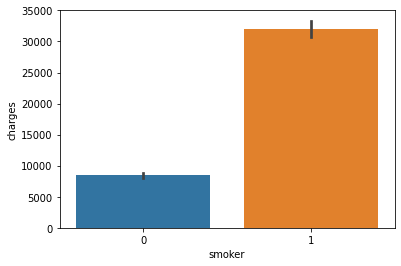

In [345]:
sns.barplot(data=data2, x='smoker', y='charges');

In [346]:
data2.charges.corr(data2.smoker)

0.7872514304984778

In [347]:
inputs, targets = data[['age', 'bmi', 'children']], data['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


In [348]:
inputs, targets = data2[['age', 'bmi', 'children', 'smoker']], data2['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


One-hot Encoding

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

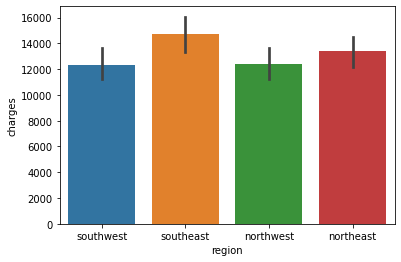

In [349]:
sns.barplot(data=data2, x='region', y='charges');
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(data2[['region']])
enc.categories_

In [350]:
one_hot = enc.transform(data2[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [351]:
data2[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [352]:
sex_codes = {'female': 0, 'male': 1}
data2['sex_code'] = data2.sex.map(sex_codes)

In [353]:
input_cols = ['age', 'bmi', 'children', 'smoker', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = data2[input_cols], data2['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


Model Improvements

In [354]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [355]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(data2[numeric_cols])
scaled_inputs = scaler.transform(data2[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [356]:
cat_cols = ['smoker', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = data2[cat_cols].values


In [357]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = data2.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


In [358]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [359]:

model = LinearRegression().fit(inputs_train, targets_train)
predictions_test = model.predict(inputs_test)
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 4859.587335765335


In [360]:
predictions_train = model.predict(inputs_train)
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6163.397986717929
